# OUTLIER TREATMENT

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("insurance.csv")
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# OUTLIER DETECTION

<Axes: >

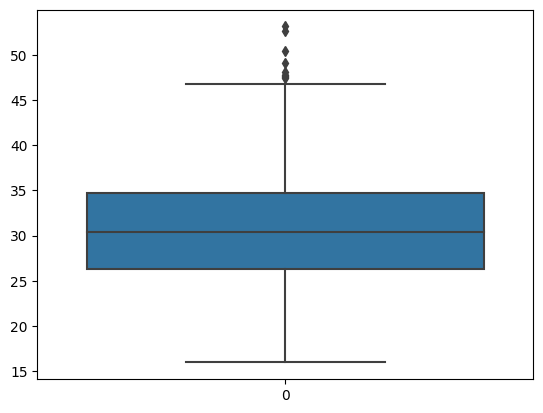

In [ ]:
sns.boxplot(df["bmi"])

## OUTLIER REMOVAL BY REPLACING WITH MEDIAN

In [ ]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(.75)

In [ ]:
Q1

26.29625

In [ ]:
Q3

34.69375

In [ ]:
IQR = Q3-Q1

In [ ]:
upper_lt = Q3 + 1.5*IQR
lower_lt = Q1 - 1.5*IQR

In [ ]:
upper_lt

47.290000000000006

In [ ]:
lower_lt

13.7

In [ ]:
df.median()

<ipython-input-55-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
df.bmi.median()

30.4

In [ ]:
df["bmi"].median()

30.4

In [ ]:
df['bmi'] = np.where(df['bmi']>upper_lt, df["bmi"].median(), df['bmi'])

<Axes: >

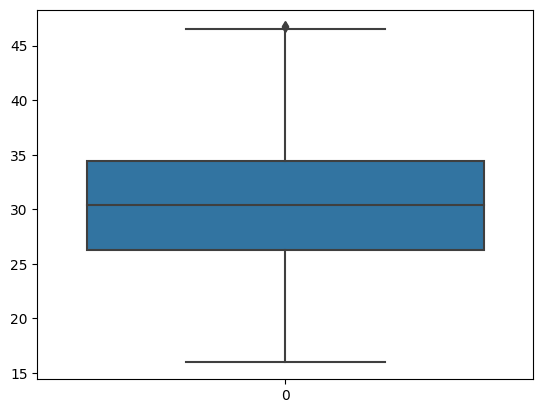

In [ ]:
sns.boxplot(df["bmi"])

In [ ]:
df.shape

(1338, 7)

# OUTLIER REMOVAL USING IQR

In [ ]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

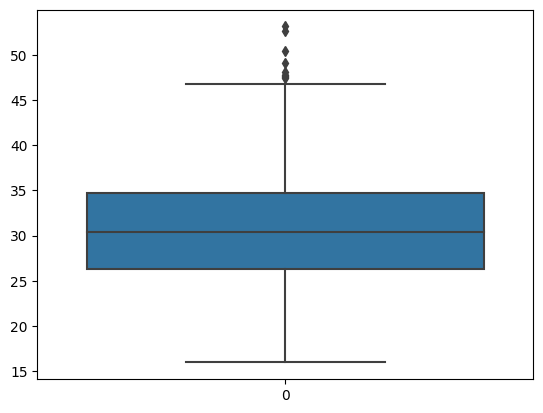

In [ ]:
sns.boxplot(df2["bmi"])

In [ ]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(.75)

In [ ]:
IQR = Q3-Q1

In [ ]:
upper_lt = Q3 + 1.5*IQR
lower_lt = Q1 - 1.5*IQR

In [ ]:
df2 = df2[df2.bmi < upper_lt]

<Axes: >

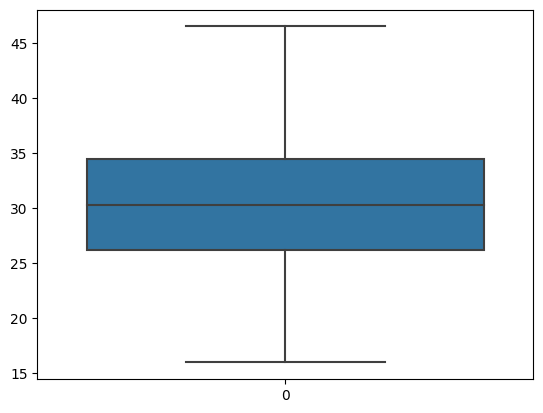

In [ ]:
sns.boxplot(df2["bmi"])

In [ ]:
df2.shape

(1327, 7)

# Z-Score for Removal

In [ ]:
from scipy import stats

<Axes: >

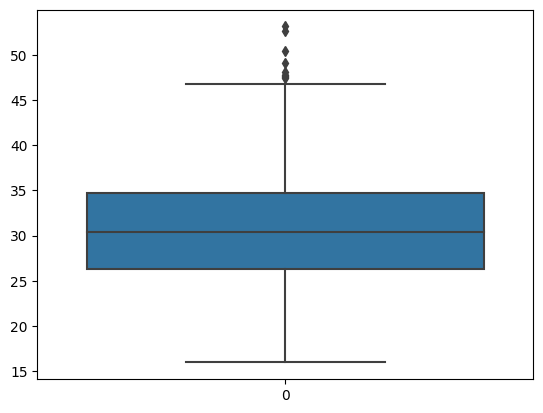

In [ ]:
sns.boxplot(df3["bmi"])

In [ ]:
# Z score = standard form of normal distribution
bmi_Zscore = stats.zscore(df3.bmi)
bmi_Zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [ ]:
df3_z = df3[np.abs(bmi_Zscore) <= 3]

<Axes: >

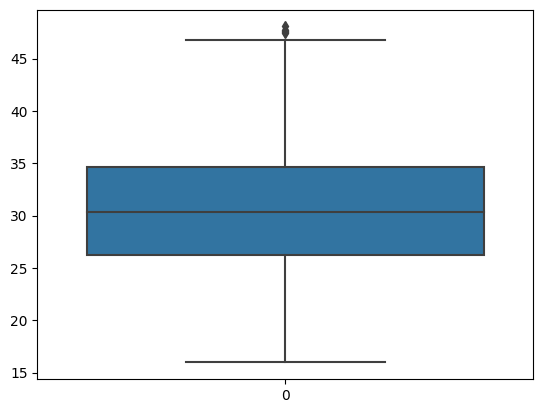

In [ ]:
sns.boxplot(df3_z.bmi)

# PERCENTILE

In [ ]:
p99 = df4.bmi.quantile(0.99)

<Axes: >

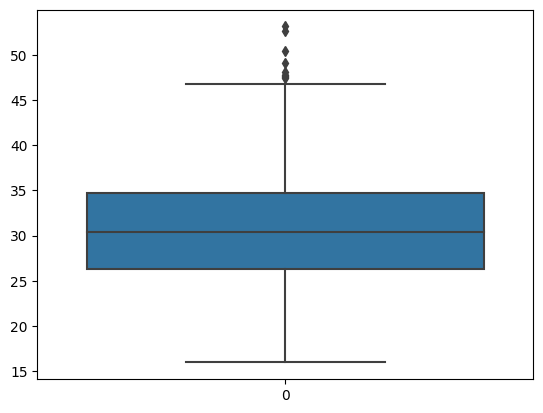

In [ ]:
sns.boxplot(df4.bmi)

In [ ]:
p99

46.40789999999996

In [ ]:
df4 = df4[df4.bmi<p99]

<Axes: >

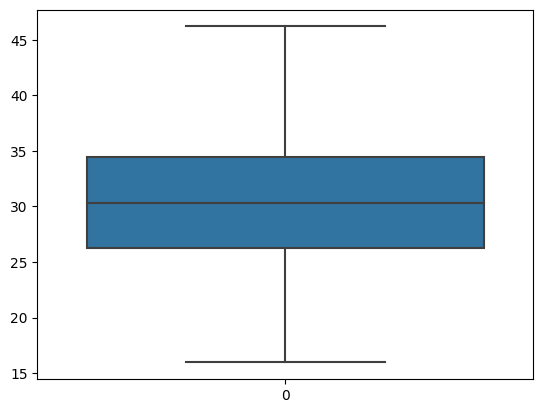

In [ ]:
sns.boxplot(df4.bmi)

In [ ]:
df4.shape

(1324, 7)